In [2]:
%matplotlib widget
import torch
import torch.nn as nn
import sys; sys.path.append('../src/')
from model.cmpnts import MLP
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

In [3]:
def nonlinearity(dataset, epsilon=1.): # epsilon can be set to the groundtruth LD manifold's average std.
    X = dataset[:]
    _, s, _ = torch.svd(X - X.mean(0), compute_uv=False)
    return s.max() / s.min(), s.min() / epsilon, s

# Nonlinear Dataset

In [22]:
from dataset.toy import IsometricEmbedding
from model.flow import _RealNVP

In [23]:
in_dim = 5
out_dim = 10

X = torch.randn(1000, in_dim)
Y = IsometricEmbedding(X, out_dim=out_dim)

In [24]:
nets = lambda: nn.Sequential(
    nn.Linear(out_dim, 256), nn.Sigmoid(), 
    nn.Linear(256, 256), nn.Sigmoid(),
    nn.Linear(256, 256), nn.Sigmoid(),
    nn.Linear(256, out_dim), nn.Tanh())
nett = lambda: nn.Sequential(
    nn.Linear(out_dim, 256), nn.Sigmoid(), 
    nn.Linear(256, 256), nn.Sigmoid(),
    nn.Linear(256, 256), nn.Sigmoid(),
    nn.Linear(256, out_dim))
masks = torch.as_tensor([
    [0]*(out_dim//2) + [1]*(out_dim//2), 
    [1]*(out_dim//2) + [0]*(out_dim//2)] * 10, dtype=torch.float) # split
flow = _RealNVP(nets, nett, masks)

Y.embed(flow = flow,
        optimizer = torch.optim.Adam(flow.parameters(), lr=1e-4),
        epochs = 100,
        batch_size = 32,
        lam = 100.)

Embedding: 100%|██████████████████████████████| 100/100 [05:01<00:00,  3.01s/it, isometricity=0.067, linearity=1.05] 


In [27]:
nonlinearity(Y)

(tensor(2.2679),
 tensor(12.4640),
 tensor([28.2674, 26.7627, 17.4188, 16.4244, 15.5683, 14.7969, 14.3936, 14.0731,
         12.8953, 12.4640]))

# Low Dimensional Illustration

In [56]:
in_dim = 1
out_dim = 2

X = torch.rand(100, in_dim)
Y = IsometricEmbedding(X, out_dim=out_dim)

In [57]:
nets = lambda: nn.Sequential(
    nn.Linear(out_dim, 256), nn.ReLU(), 
    nn.Linear(256, 256), nn.ReLU(),
    nn.Linear(256, 256), nn.ReLU(),
    nn.Linear(256, out_dim), nn.Tanh())
nett = lambda: nn.Sequential(
    nn.Linear(out_dim, 256), nn.ReLU(), 
    nn.Linear(256, 256), nn.ReLU(),
    nn.Linear(256, 256), nn.ReLU(),
    nn.Linear(256, out_dim))
masks = torch.as_tensor([
    [0]*(out_dim//2) + [1]*(out_dim//2), 
    [1]*(out_dim//2) + [0]*(out_dim//2)] * 10, dtype=torch.float) # split
flow = _RealNVP(nets, nett, masks)

Y.embed(flow = flow,
        optimizer = torch.optim.Adam(flow.parameters(), lr=1e-4),
        epochs = 300,
        batch_size = 100,
        lam = 1.)

Embedding: 100%|██████████████████████████████| 300/300 [00:41<00:00,  7.22it/s, isometricity=0.0766, linearity=0.018]  


In [58]:
nonlinearity(Y[:])

(tensor(1.0259), tensor(1.2711), tensor([1.3040, 1.2711]))

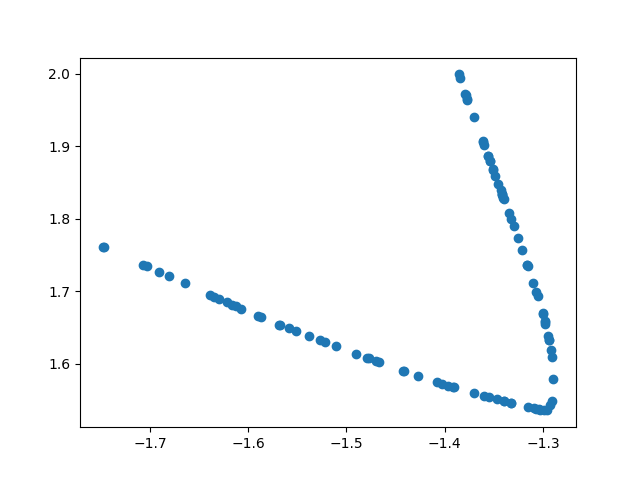

In [71]:
fig = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1])

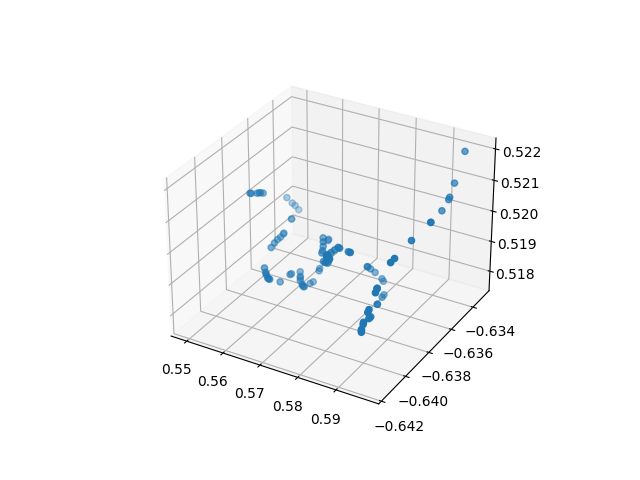

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2])